<a href="https://colab.research.google.com/github/anchalchepurwar/ML_pr/blob/main/ML_pr6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:

n_samples = 1000

visits = np.random.randint(1, 31, size=n_samples)

time_spent = np.random.randint(1, 121, size=n_samples)

age_group = np.random.randint(0, 5, size=n_samples)
age_group_labels = ['18-24', '25-34', '35-44', '45-54', '55+']

product_category = np.random.randint(0, 4, size=n_samples)
category_labels = ['Electronics', 'Clothing', 'Home Goods', 'Books']

purchase_prob = (0.02 * visits + 0.01 * time_spent +
                 (age_group == 1) * 0.1 + (age_group == 2) * 0.15 +
                 (product_category == 0) * 0.15 + (product_category == 2) * 0.1)
purchase_prob = np.clip(purchase_prob, 0.1, 0.9)  # Clip probabilities
purchase = np.random.binomial(1, purchase_prob)

data = pd.DataFrame({
    'visits': visits,
    'time_spent': time_spent,
    'age_group': [age_group_labels[i] for i in age_group],
    'product_category': [category_labels[i] for i in product_category],
    'purchase': purchase
})

print("E-commerce dataset first 5 rows")
print(df.head(5))

E-commerce Customer Dataset (first 5 rows):
   visits  time_spent age_group product_category  purchase
0       7          17       55+            Books         0
1      20          85     18-24            Books         1
2      29          78     18-24       Home Goods         1
3      15          73     35-44         Clothing         1
4      11         110       55+      Electronics         1


In [ ]:
# Split features and target
X = data.drop('purchase', axis=1)
y = data['purchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Create a preprocessing pipeline
# Numerical features will be standardized
# Categorical features will be one-hot encoded
numeric_features = ['visits', 'time_spent']
categorical_features = ['age_group', 'product_category']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)

    ])


Training set shape: (800, 4)
Testing set shape: (200, 4)


In [ ]:
# Create a pipeline with preprocessing and model
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the model
dt_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = dt_pipeline.predict(X_test)


Model Accuracy: 0.6250

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29        46
           1       0.78      0.71      0.75       154

    accuracy                           0.62       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.66      0.62      0.64       200



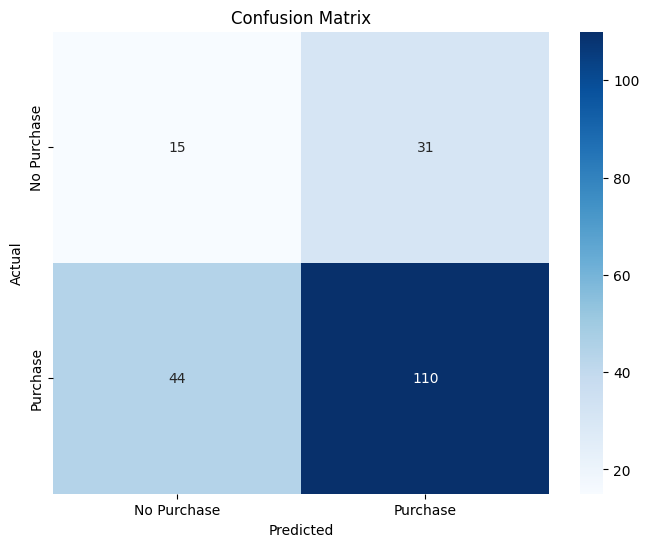

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

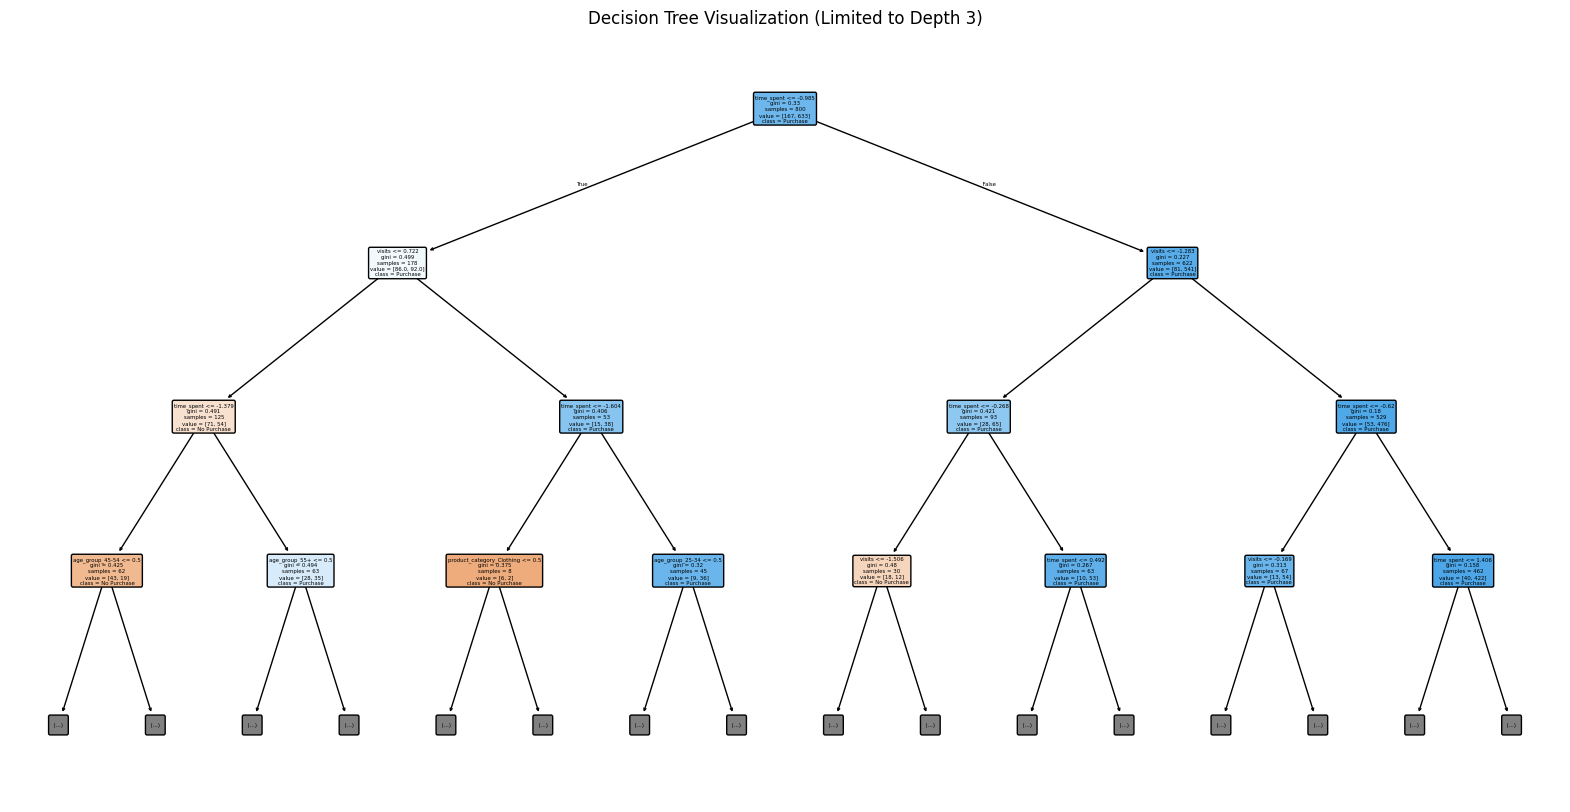

In [ ]:
# Extract the decision tree classifier from the pipeline
dt_classifier = dt_pipeline.named_steps['classifier']

# Get feature names after preprocessing
preprocessor = dt_pipeline.named_steps['preprocessor']
feature_names = (
    numeric_features +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)

# Plot the decision tree (limited depth for better visualization)
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, max_depth=3, feature_names=feature_names,
          class_names=['No Purchase', 'Purchase'], filled=True, rounded=True)
plt.title('Decision Tree Visualization (Limited to Depth 3)')
plt.show()

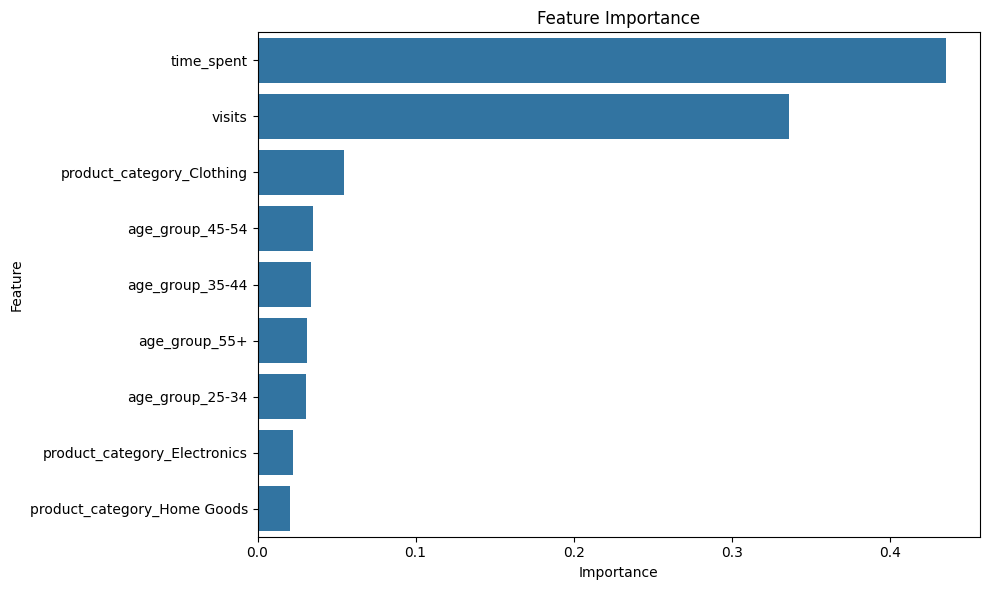


Feature Importance:
                        Feature  Importance
1                    time_spent    0.435224
0                        visits    0.336338
6     product_category_Clothing    0.054953
4               age_group_45-54    0.035124
3               age_group_35-44    0.033679
5                 age_group_55+    0.031011
2               age_group_25-34    0.030735
7  product_category_Electronics    0.022408
8   product_category_Home Goods    0.020527


In [ ]:
# Extract feature importance
feature_importance = dt_classifier.feature_importances_

# Create a DataFrame for easier visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
print(importance_df)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

print(f"\nOptimized Model Accuracy: {accuracy_optimized:.4f}")
print("\nOptimized Model Classification Report:")
print(classification_report(y_test, y_pred_optimized))


Best Parameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best Cross-Validation Score: 0.8125

Optimized Model Accuracy: 0.7600

Optimized Model Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.24      0.31        46
           1       0.80      0.92      0.85       154

    accuracy                           0.76       200
   macro avg       0.63      0.58      0.58       200
weighted avg       0.72      0.76      0.73       200



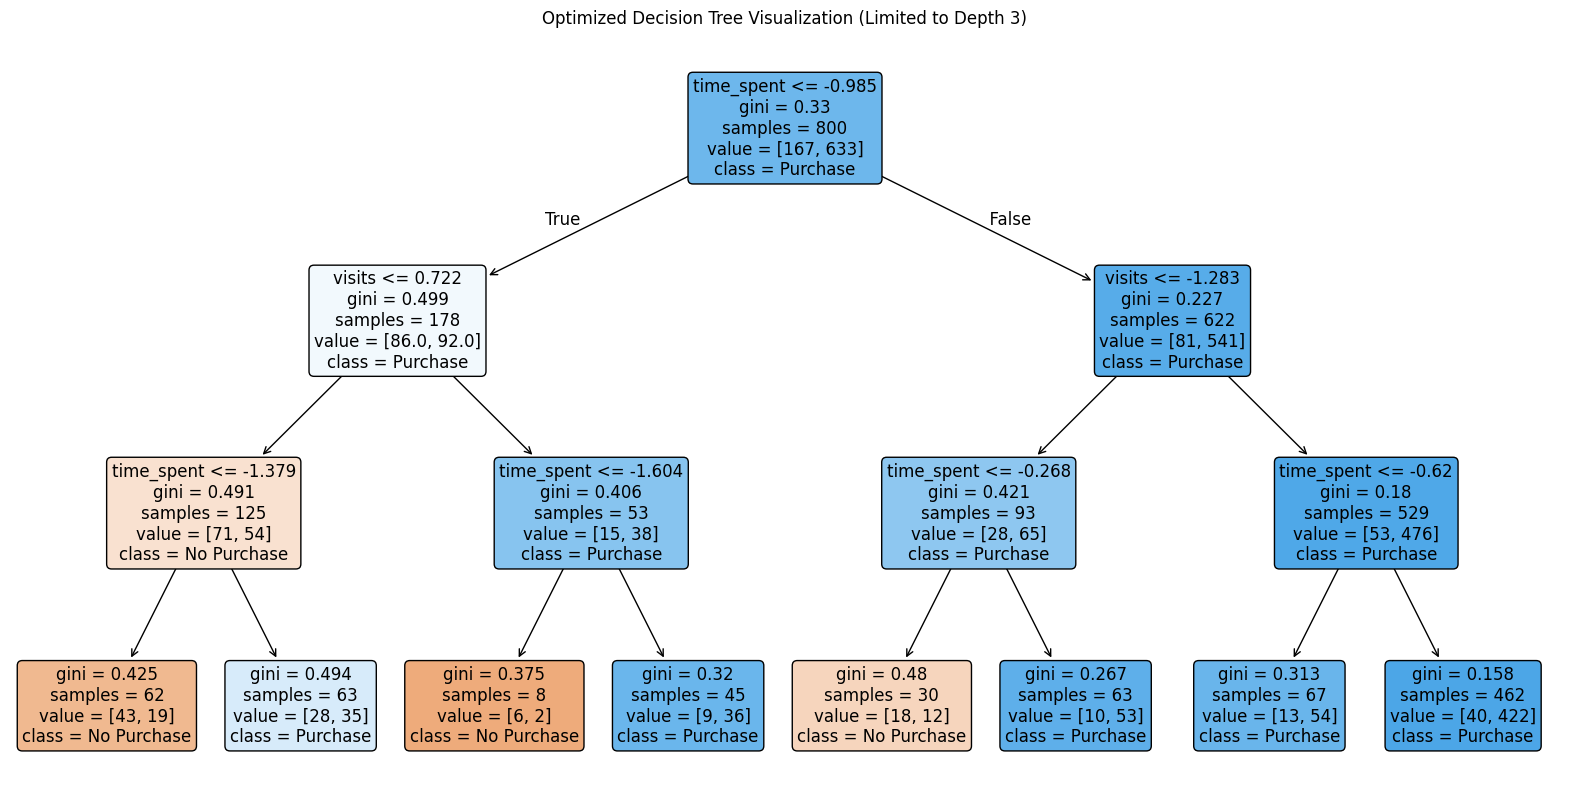

In [ ]:
optimized_dt = best_model.named_steps['classifier']
plt.figure(figsize=(20, 10))
plot_tree(optimized_dt, max_depth=3, feature_names=feature_names,
          class_names=['No Purchase', 'Purchase'], filled=True, rounded=True)
plt.title('Optimized Decision Tree Visualization (Limited to Depth 3)')
plt.show()

In [ ]:
import joblib
joblib.dump(best_model, 'ecommerce_purchase_predictor.pkl')
print("\nModel saved as 'ecommerce_purchase_predictor.pkl'")

# For Google Colab, you might want to download the model
from google.colab import files
files.download('ecommerce_purchase_predictor.pkl')


Model saved as 'ecommerce_purchase_predictor.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def predict_purchase_likelihood(visits, time_spent, age_group, product_category):

    # Create a DataFrame for the new customer
    new_customer = pd.DataFrame({
        'visits': [visits],
        'time_spent': [time_spent],
        'age_group': [age_group],
        'product_category': [product_category]
    })

    # Make prediction
    prediction = best_model.predict(new_customer)[0]
    probability = best_model.predict_proba(new_customer)[0][1]

    return prediction, probability

# Example usage
new_visits = 15
new_time = 45
new_age = '25-34'
new_category = 'Electronics'

prediction, probability = predict_purchase_likelihood(new_visits, new_time, new_age, new_category)
print(f"\nPrediction for new customer (visits={new_visits}, time={new_time}, age={new_age}, category={new_category}):")
print(f"Purchase Prediction: {'Yes' if prediction == 1 else 'No'}")
print(f"Purchase Probability: {probability:.2f}")


Prediction for new customer (visits=15, time=45, age=25-34, category=Electronics):
Purchase Prediction: Yes
Purchase Probability: 0.91
